# 1번 - linear regression

In [336]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [337]:
X = 2*np.random.rand(100,1)   #행이 100, 열이 1. 값은 다 랜덤으로 
y = 4+3*X+np.random.randn(100,1)    #random으로 bias 정해줌(분산되도록)

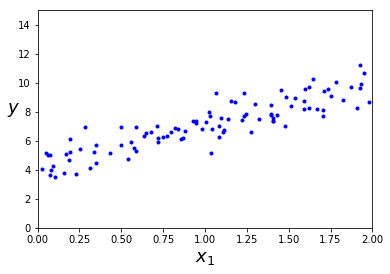

In [338]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

정규 방정식을 이용한 선형회귀 접근

c_ : 열추가 /
ones(100,1): 행100, 열1인 배열에 모두 1로 채움

In [339]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [340]:
print(theta_best)  # 4+3x 예측. 정규방정식으로 찾은 theta best값.

[[4.30382837]
 [2.77805301]]


In [341]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [342]:
y_predict  #0,2를 넣었을때 y예측값 -> 비슷하게 나옴! 

array([[4.30382837],
       [9.85993439]])

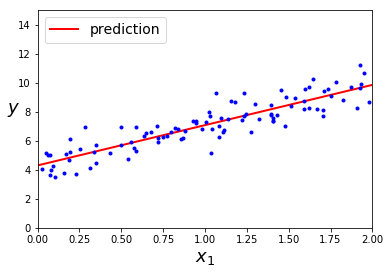

In [343]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

LinearRegression 모듈 이용

In [344]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [345]:
lin_reg.intercept_, lin_reg.coef_   #y절편 , x계수

(array([4.30382837]), array([[2.77805301]]))

In [346]:
lin_reg.predict(X_new)  # y예측값 

array([[4.30382837],
       [9.85993439]])

In [347]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)  # ??????

In [348]:
theta_best_svd

array([[4.30382837],
       [2.77805301]])

In [349]:
np.linalg.pinv(X_b).dot(y)

array([[4.30382837],
       [2.77805301]])

경사 하강법을 사용한 선형회귀 접근

In [350]:
eta = 0.1   #learning data
n_iterations = 1000
m = 100  #data 개수
theta = np.random.randn(2,1)   #초기값

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 손실함수 미분한거.
    theta = theta - eta * gradients

In [351]:
theta

array([[4.30382837],
       [2.77805301]])

In [352]:
X_new_b.dot(theta)

array([[4.30382837],
       [9.85993439]])

In [353]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

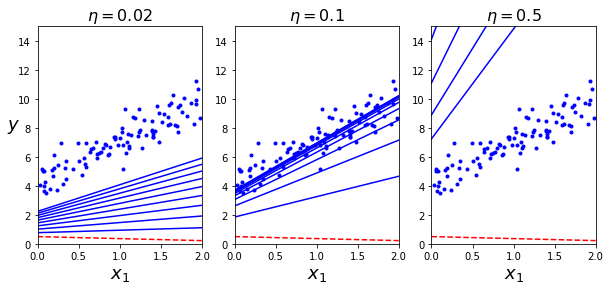

In [354]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

스토캐스틱 경사 하강법을 사용한 선형회귀 접근

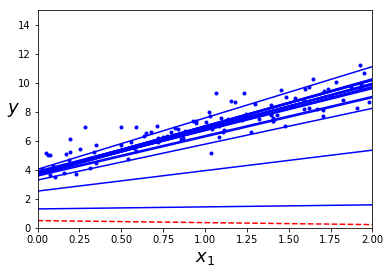

In [355]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: 
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--" 
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


In [356]:
theta

array([[4.31367004],
       [2.78186665]])

In [357]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)

In [358]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [359]:
sgd_reg.intercept_

array([4.32433554])

In [360]:
sgd_reg.coef_

array([2.79915787])

미니배치 경사 하강법을 사용한 선형회귀 접근

In [361]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [362]:
theta

array([[4.32539128],
       [2.83610849]])

In [363]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

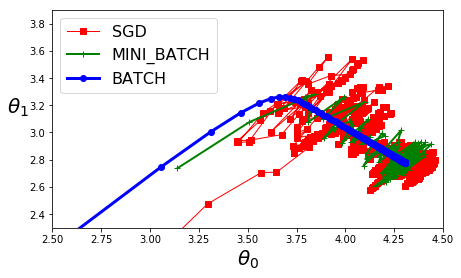

In [364]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [365]:
theta_path_mgd

array([[[3.14046417],
        [2.73642931]],

       [[3.50768872],
        [3.07506929]],

       [[3.76401006],
        [3.23368568]],

       [[3.84428254],
        [3.27868858]],

       [[3.79414821],
        [3.2629063 ]],

       [[3.80248957],
        [3.20094748]],

       [[3.81802471],
        [3.16288816]],

       [[3.81091645],
        [3.07683166]],

       [[3.99432874],
        [3.26129542]],

       [[3.88574455],
        [3.09660409]],

       [[4.09867367],
        [3.22430054]],

       [[3.93531595],
        [3.0393982 ]],

       [[3.89211996],
        [2.95729518]],

       [[3.94007889],
        [3.02559578]],

       [[4.02489799],
        [3.08411739]],

       [[4.03275804],
        [3.05610121]],

       [[3.98289128],
        [2.92088456]],

       [[4.11738203],
        [3.09628475]],

       [[4.06918996],
        [3.01123413]],

       [[4.03038952],
        [2.92768239]],

       [[4.07937746],
        [3.02860114]],

       [[4.04506567],
        [2.9

In [366]:
theta_path_bgd

array([[[1.84539516],
        [1.40592671]],

       [[2.61338657],
        [2.26681941]],

       [[3.05442192],
        [2.74352923]],

       ...,

       [[4.30382837],
        [2.77805301]],

       [[4.30382837],
        [2.77805301]],

       [[4.30382837],
        [2.77805301]]])

In [367]:
theta_path_sgd

array([[[1.30216376],
        [0.14089538]],

       [[2.53241268],
        [1.41125127]],

       [[3.2945944 ],
        [2.47375658]],

       ...,

       [[4.31268542],
        [2.78079394]],

       [[4.31375076],
        [2.78189402]],

       [[4.31367004],
        [2.78186665]]])

# 2번 - Polynomial regression

In [368]:
import numpy as np
import numpy.random as rnd

In [369]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3  #-3 ~ +3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

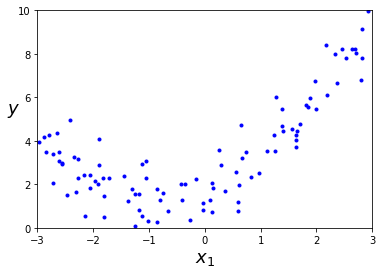

In [370]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [371]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [372]:
X[0]

array([-0.75275929])

In [373]:
X_poly[0]  # X[0]이 들어왔을때 x값과 x^2값.

array([-0.75275929,  0.56664654])

In [374]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [375]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

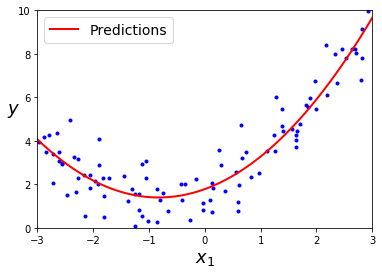

In [376]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

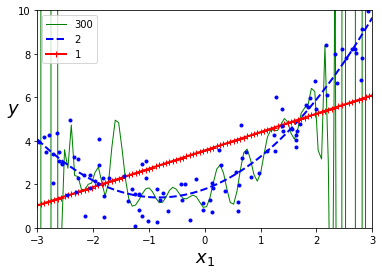

In [377]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# 3번 - Regularized models

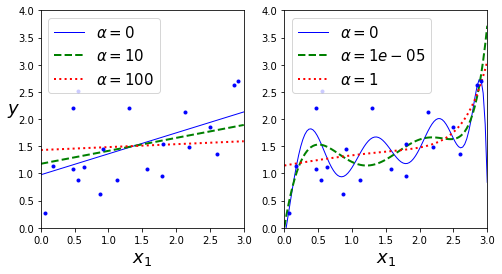

In [378]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)  #alpha뭘까
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

# 4번 - 선형분리

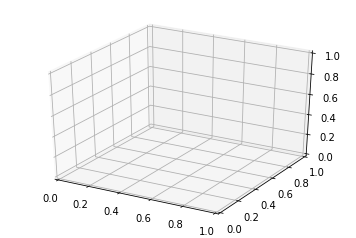

In [379]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')

In [380]:
xdata1 = np.array([0,0,1])
ydata1 = np.array([0,1,1])
zdata1 = np.array([0,1,1])
xdata2 = np.array([1,0,0])
ydata2 = np.array([0,0,1])
zdata2 = np.array([1,1,0])

In [381]:
ax.scatter3D(xdata1, ydata1, zdata1, c='r', marker='o')
ax.scatter3D(xdata2, ydata2, zdata2, c='b', marker='^')

In [382]:
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Text(0.0937963,0.0125663,'z')

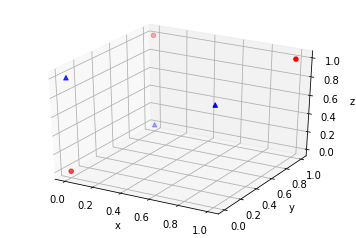

In [383]:
fig

# 5번 - 행렬

In [384]:
A=np.array([[1,-2,3,5],[2,2,-1,0],[3,0,1,2],[1,0,2,0]])

In [385]:
2*A

array([[ 2, -4,  6, 10],
       [ 4,  4, -2,  0],
       [ 6,  0,  2,  4],
       [ 2,  0,  4,  0]])

In [386]:
A.T

array([[ 1,  2,  3,  1],
       [-2,  2,  0,  0],
       [ 3, -1,  1,  2],
       [ 5,  0,  2,  0]])

In [387]:
from numpy import linalg

linalg.inv(A)

array([[-0.23529412, -0.23529412,  0.58823529, -0.05882353],
       [ 0.29411765,  0.79411765, -0.73529412,  0.32352941],
       [ 0.11764706,  0.11764706, -0.29411765,  0.52941176],
       [ 0.29411765,  0.29411765, -0.23529412, -0.17647059]])

행렬식 : 2X2행렬에서 ad-bc

In [388]:
linalg.det(A)

34.00000000000001

고유 분해 : 고윳값과 고유벡터 계산

정방행렬 A에 대하여 Ax = λx  (상수 λ) 가 성립하는 0이 아닌 벡터 x가 존재할 때 상수 λ 를 행렬 A의 고유값 (eigenvalue), x 를 이에 대응하는 고유벡터 (eigenvector) 라고 한다. 

In [389]:
w, v = np.linalg.eig(A)  #고유값(eigenvalue) w, 고유벡터(eigenvector) v 의 두 개의 객체를 반환

In [390]:
w  #고유값

array([ 5.52552524+0.j        , -1.52204833+1.31733645j,
       -1.52204833-1.31733645j,  1.51857142+0.j        ])

In [391]:
v  #교유벡터

array([[-0.68465996+0.j        ,  0.619935  +0.j        ,
         0.619935  -0.j        ,  0.11199539+0.j        ],
       [-0.21666012+0.j        , -0.34875983-0.24694874j,
        -0.34875983+0.24694874j, -0.93998928+0.j        ],
       [-0.60547918+0.j        , -0.31379356-0.41033136j,
        -0.31379356+0.41033136j, -0.22854692+0.j        ],
       [-0.34306572+0.j        , -0.263929  +0.31075191j,
        -0.263929  -0.31075191j, -0.22725204+0.j        ]])

특이값 분해(SVD)

In [392]:
u, s, vh = np.linalg.svd(A)

In [393]:
u

array([[-0.8819521 ,  0.25706354, -0.24178316, -0.31244156],
       [ 0.05743106, -0.76320224, -0.26028922, -0.58862003],
       [-0.42722253, -0.58124436,  0.04756433,  0.69092224],
       [-0.19063859, -0.11660051,  0.93355667, -0.28023773]])

In [394]:
s

array([6.97059301, 3.8068416 , 1.85521105, 0.69063894])

In [395]:
vh

array([[-0.32126336,  0.26952747, -0.50380033, -0.75520197],
       [-0.8221184 , -0.53601693,  0.18911937,  0.03226532],
       [ 0.16919264, -0.01995035,  0.78137601, -0.60035603],
       [ 0.43850318, -0.7997767 , -0.31602313, -0.2611543 ]])

# 6번 - norm

norm: error를 측정하고 가늠하기위한 측정 도구. 벡터나 행렬의 크기 일반화

np.linalg.norm(x, ord=None)

x: vector

ord: 차수

In [396]:
x=np.array([3, -4, -1.2, 0, 2.3])

In [397]:
np.linalg.norm(x.T, ord=1)

10.5

In [398]:
np.linalg.norm(x.T, ord=2)

5.632938842203065

In [399]:
np.linalg.norm(x.T, ord=3)

4.716120891176797

In [400]:
np.linalg.norm(x.T, np.inf)

4.0

프로베니우스 놈: 행렬에 대한 L2놈

In [401]:
x2=np.array([[2,1],[1,5],[4,1]])

In [402]:
np.linalg.norm(x2)

6.928203230275509